#### Imports & data loading

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gopalns/ec-mixed-class")

print("Path to dataset files:", path)

100%|██████████| 398k/398k [00:00<00:00, 58.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gopalns/ec-mixed-class/versions/1


In [2]:
! mv /root/.cache/kagglehub/datasets/gopalns/ec-mixed-class/versions/1 /content/Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df_desc = pd.read_csv("/content/Data/mixed_desc.csv")
df_ecfp = pd.read_csv("/content/Data/mixed_ecfp.csv")
df_fcfp = pd.read_csv("/content/Data/mixed_fcfp.csv")

In [5]:
df_desc=df_desc.drop("EC1_EC2_EC3_EC4_EC5_EC6",axis="columns")
df_desc.head()

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,0,0,0,0,0,0,0
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,0,0,0,0,0,0,0
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,0,0,0,0,0,0,0
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0,0,0,0,0,0,0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_ecfp=df_ecfp.drop("EC1_EC2_EC3_EC4_EC5_EC6",axis="columns")
df_ecfp.head()

,CIDs,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M503,M504,M505,M506,M507,M508,M509,M510,M511,M512
0,C00009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C00013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C00014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C00017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C00022,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df_fcfp.head()

,CIDs,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F504,F505,F506,F507,F508,F509,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6
0,C00009,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1_1_1_1_0_1
1,C00013,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1_1_1_1_0_1
2,C00014,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1_1_1_1_0_1
3,C00017,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0_1_1_0_0_0
4,C00022,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1_1_1_1_0_1


In [8]:
df = df_desc.merge(df_ecfp, on="CIDs").merge(df_fcfp, on="CIDs")
df.head()

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,F504,F505,F506,F507,F508,F509,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,1,0,0,0,0,0,0,0,1_1_1_1_0_1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,1,0,0,0,0,0,0,0,1_1_1_1_0_1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,0,0,0,0,0,0,1_1_1_1_0_1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,1,0,0,0,1,0,0,0,0_1_1_0_0_0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,1,0,0,0,0,0,0,0,1_1_1_1_0_1


##### Preprocess target var.

In [9]:
len(df["EC1_EC2_EC3_EC4_EC5_EC6"].unique())

52

^ 52 class classification problem possible



In [10]:
df["EC1_EC2_EC3_EC4_EC5_EC6"].value_counts()

,count
EC1_EC2_EC3_EC4_EC5_EC6,
1_0_0_0_0_0,178
0_1_0_0_0_0,136
1_1_0_0_0_0,112
0_1_1_0_0_0,90
0_0_1_0_0_0,69
1_1_0_1_0_0,38
1_1_1_0_0_0,37
1_0_0_1_0_0,33
0_0_0_1_0_0,30


Will continue with[ 6 class multilabel](https://scikit-learn.org/stable/modules/multiclass.html#multilabel-classification)

In [11]:
label = "0_0_1_0_1_1"

label.split("_")

['0', '0', '1', '0', '1', '1']

In [12]:
labels = list(df["EC1_EC2_EC3_EC4_EC5_EC6"].values)
labels[:5]

['1_1_1_1_0_1', '1_1_1_1_0_1', '1_1_1_1_0_1', '0_1_1_0_0_0', '1_1_1_1_0_1']

In [13]:
multilabels = list() #list of 6-member lists of binaries for each class
for s in labels:
    s_list = s.split("_")
    multilabels.append(s_list)
multilabels[:5]

[['1', '1', '1', '1', '0', '1'],
 ['1', '1', '1', '1', '0', '1'],
 ['1', '1', '1', '1', '0', '1'],
 ['0', '1', '1', '0', '0', '0'],
 ['1', '1', '1', '1', '0', '1']]

In [14]:
multilabels = [[int(x) for x in sublist] for sublist in multilabels]

In [15]:
multilabels[:5]

[[1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 1],
 [0, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 1]]

In [16]:
len(multilabels)

1039

In [17]:
pd.DataFrame(multilabels)

,0,1,2,3,4,5
0,1,1,1,1,0,1
1,1,1,1,1,0,1
2,1,1,1,1,0,1
3,0,1,1,0,0,0
4,1,1,1,1,0,1
...,...,...,...,...,...,...
1034,0,1,0,0,0,1
1035,0,1,0,0,0,0
1036,0,1,0,0,0,0
1037,0,1,1,0,0,0


In [18]:
target = pd.DataFrame(
    df[["CIDs","EC1_EC2_EC3_EC4_EC5_EC6"]]
    )
target.head()

,CIDs,EC1_EC2_EC3_EC4_EC5_EC6
0,C00009,1_1_1_1_0_1
1,C00013,1_1_1_1_0_1
2,C00014,1_1_1_1_0_1
3,C00017,0_1_1_0_0_0
4,C00022,1_1_1_1_0_1


In [19]:
target[["EC1","EC2","EC3","EC4","EC5","EC6"]] = pd.DataFrame(multilabels)

target.head()

,CIDs,EC1_EC2_EC3_EC4_EC5_EC6,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,1_1_1_1_0_1,1,1,1,1,0,1
1,C00013,1_1_1_1_0_1,1,1,1,1,0,1
2,C00014,1_1_1_1_0_1,1,1,1,1,0,1
3,C00017,0_1_1_0_0_0,0,1,1,0,0,0
4,C00022,1_1_1_1_0_1,1,1,1,1,0,1


In [20]:
df[["EC1","EC2","EC3","EC4","EC5","EC6"]] = pd.DataFrame(multilabels)
df.head()

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1


In [21]:
df.shape

(1039, 1228)

In [22]:
y=["EC1_EC2_EC3_EC4_EC5_EC6"]
for x in "EC1_EC2_EC3_EC4_EC5_EC6".split("_"):
    y.append(x)
y

['EC1_EC2_EC3_EC4_EC5_EC6', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

In [23]:
df[y].dtypes

,0
EC1_EC2_EC3_EC4_EC5_EC6,object
EC1,int64
EC2,int64
EC3,int64
EC4,int64
EC5,int64
EC6,int64


##### Altered csvs (with multilabel target cols)

In [24]:
df.to_csv("enzymes.csv") #three og csvs together + 6 target cols

In [25]:
df_desc["EC1_EC2_EC3_EC4_EC5_EC6".split("_")] = pd.DataFrame(multilabels)
df_desc["EC1_EC2_EC3_EC4_EC5_EC6"]=df["EC1_EC2_EC3_EC4_EC5_EC6"]
df_desc.head()

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_thiophene,fr_unbrch_alkane,fr_urea,EC1,EC2,EC3,EC4,EC5,EC6,EC1_EC2_EC3_EC4_EC5_EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,1,1,1,1,0,1,1_1_1_1_0_1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,1,1,1,1,0,1,1_1_1_1_0_1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,1,1,1,1,0,1,1_1_1_1_0_1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0,1,1,0,0,0,0_1_1_0_0_0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,1,1,1,1,0,1,1_1_1_1_0_1


In [26]:
df_ecfp["EC1_EC2_EC3_EC4_EC5_EC6".split("_")] = pd.DataFrame(multilabels)
df_ecfp["EC1_EC2_EC3_EC4_EC5_EC6"]=df["EC1_EC2_EC3_EC4_EC5_EC6"]
df_fcfp["EC1_EC2_EC3_EC4_EC5_EC6".split("_")] = pd.DataFrame(multilabels)
df_fcfp["EC1_EC2_EC3_EC4_EC5_EC6"]=df["EC1_EC2_EC3_EC4_EC5_EC6"]

In [27]:
df_desc.to_csv("df_desc.csv") #mixed_dexc + 6 targets
df_ecfp.to_csv("df_ecfp.csv") #mixed_ecfp + 6 targets
df_fcfp.to_csv("df_fcfp.csv") #mixed_fcfp + 6 targets

# EDA

In [49]:
cols = list(df.columns)
cols.remove("CIDs")

In [55]:
corr = df[cols].corr()

# Define what "significant multicollinearity" means — usually |r| > 0.8 or 0.9
threshold = 0.8

# Create a boolean mask for correlations above the threshold (excluding self-correlation)
mask = (corr.abs() > threshold) & (corr.abs() < 1.0)

# Find which rows/columns have at least one strong correlation
cols_with_multicollinearity = mask.any(axis=1)

# Filter the correlation matrix to keep only those variables
filtered_corr = corr.loc[cols_with_multicollinearity, cols_with_multicollinearity]

filtered_corr.shape  # Should now be smaller than (134, 134)

(242, 242)

In [51]:
filtered_corr.head()

,MinEStateIndex,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BertzCT,Chi0,...,F466,F477,F482,F492,F493,F494,F498,F499,EC1_EC2_EC3_EC4_EC5_EC6,EC1
MinEStateIndex,1.000000,-0.612706,-0.624632,-0.612826,-0.580732,-0.025287,-0.026493,-0.029094,-0.544384,-0.576618,...,-0.451224,-0.588206,0.107774,-0.411288,-0.461085,-0.449362,-0.426710,-0.131294,0.187939,0.194583
MolWt,-0.612706,1.000000,0.999503,1.000000,0.996491,0.025209,0.027238,0.032613,0.955934,0.995418,...,0.601271,0.612035,0.045817,0.577435,0.612737,0.594477,0.519622,0.119312,-0.139621,-0.136205
HeavyAtomMolWt,-0.624632,0.999503,1.000000,0.999504,0.993897,0.025464,0.027528,0.032930,0.959185,0.993560,...,0.609599,0.624202,0.052867,0.583203,0.619982,0.601333,0.529673,0.127029,-0.140689,-0.137557
ExactMolWt,-0.612826,1.000000,0.999504,1.000000,0.996496,0.025208,0.027237,0.032611,0.955922,0.995421,...,0.601289,0.612097,0.045756,0.577439,0.612754,0.594486,0.519655,0.119357,-0.139641,-0.136233
NumValenceElectrons,-0.580732,0.996491,0.993897,0.996496,1.000000,0.025163,0.027163,0.032515,0.946347,0.997465,...,0.571771,0.577317,0.037943,0.550847,0.583811,0.564754,0.491058,0.112118,-0.140468,-0.136819


ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does not match the number of labels (121).

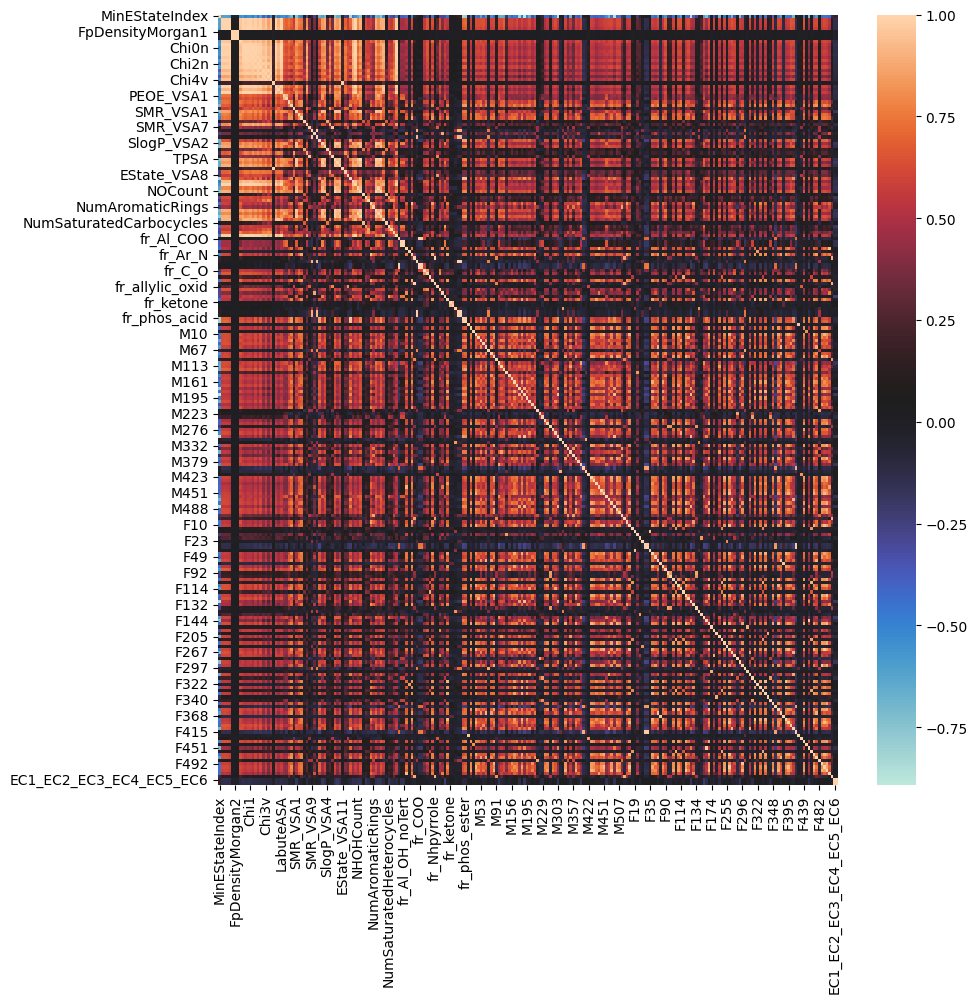

In [53]:
#plot correlations
plt.figure(figsize=(10,10))
ax = sns.heatmap(filtered_corr,cmap="icefire")
#shortened = [ x[:10] for x in filtered_corr.columns ]
#ax.set_yticklabels(shortened[::2])#shorten Y labels
#ax.set_xticklabels(shortened[::2])#shorten X labels
#plt.yticks(rotation=50)
#plt.xticks(rotation=50)
plt.show()

^^ gross

In [3]:
df=pd.read_csv("/content/enzymes.csv")
classes = df.columns[-6:]

In [9]:
df.isnull().sum().sum()

np.int64(0)

^^I think this means no nulls?

In [12]:
df[classes].sum()/1039

,0
EC1,0.541867
EC2,0.588065
EC3,0.295476
EC4,0.235804
EC5,0.127045
EC6,0.126083


In [ ]:
#Density plot?

# Baseline Models

In [37]:
import pandas as pd
import numpy as np
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
#from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
#from scipy.stats import chi2_contingency

import data

In [2]:
df_full = pd.read_csv("/content/enzymes.csv")
df_desc = pd.read_csv("/content/df_desc.csv")
df_fcfp = pd.read_csv("/content/df_fcfp.csv")
full_df = pd.read_csv("/content/enzymes.csv")

In [4]:
df_full = df_full[list(df_full.columns)[1:]]
df_full

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6,EC1,EC2,EC3,EC4,EC5,EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,C22158,4.750000,0.250000,4.750000,0.250000,0.371490,16.023,14.007,16.018724,7,...,0,0,0,0_1_0_0_0_1,0,1,0,0,0,1
1035,C22169,13.516859,-0.727746,13.516859,0.138810,0.536654,405.458,382.274,405.180090,154,...,0,0,0,0_1_0_0_0_0,0,1,0,0,0,0
1036,C22180,13.606147,-2.044178,13.606147,0.276604,0.060282,831.693,794.397,831.197041,316,...,0,0,0,0_1_0_0_0_0,0,1,0,0,0,0
1037,C22181,13.774221,-2.149645,13.774221,0.322613,0.051119,993.834,946.458,993.249864,380,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0


In [25]:
df_full.dtypes.value_counts()

,count
int64,1142
float64,84
object,2


In [99]:
X_cols = list(df_full.columns)[1:-7] #define training columns

## Train/Test Split

Starting with 1 EC

In [38]:
x = df_full[X_cols]
y = df_full["EC1"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1116)

In [95]:
x.shape

(1039, 1220)

In [96]:
y.shape

(1039,)

Define/store metrics

In [42]:
metrics_df = pd.DataFrame(data=["accuracy","precision","recall","f1"],columns=["metric"])
metrics_df

,metric
0,accuracy
1,precision
2,recall
3,f1


##### Dropping problematic col**

*can be preprocessed in the future*

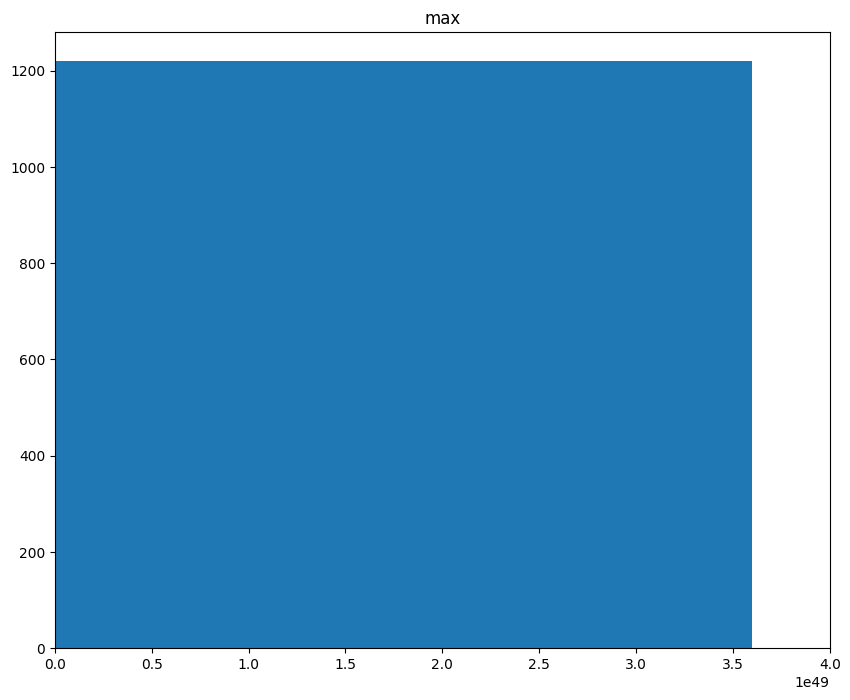

In [ ]:
pd.DataFrame(x.describe().loc["max"]).hist(grid=False,figsize=(10,8))
plt.xlim(-0.1e10,0.4e50)
plt.show()

In [ ]:
cols_with_val = (x == val).any()
list(cols_with_val).index(True)

28

In [ ]:
x[x.columns[28]].describe()

,Ipc
count,1.039000e+03
mean,3.464870e+47
std,1.116850e+49
min,0.000000e+00
25%,1.610613e+02
50%,2.188310e+03
75%,1.641033e+06
max,3.600000e+50


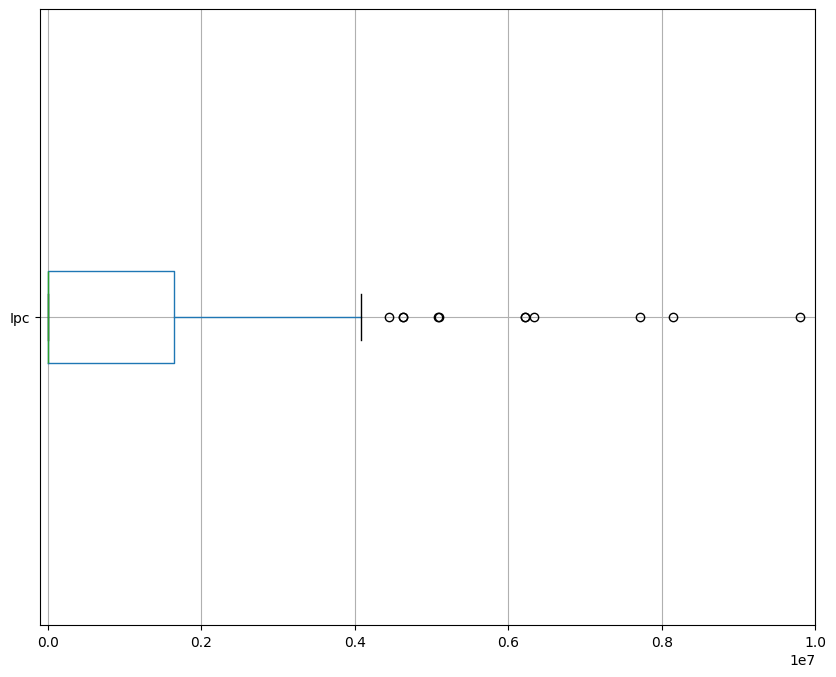

In [ ]:
pd.DataFrame(x["Ipc"]).boxplot(vert=False,figsize=(10,8))
plt.xlim(-100000,10000000)
plt.show()

In [ ]:
x[X_cols[21:40]].describe()

,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1.039000e+03,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,5.277378,6.303263,3.456446,4.182612,2.280429,2.893743,-1.345309,3.464870e+47,17.869378,7.619402,10.097855,129.531384,21.261992,12.799799,5.526510,2.439632,0.910046,23.903545,7.888562
std,5.039212,6.123113,3.570430,4.344008,2.610461,3.276361,1.224385,1.116850e+49,15.944505,8.209429,71.412274,108.545928,20.602234,16.436686,8.059472,5.055878,2.609803,47.728827,10.657067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.730000,0.000000e+00,0.000000,-27.040000,-104.040000,2.853276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.977220,2.190495,1.067171,1.220149,0.516013,0.640038,-1.855000,1.610613e+02,7.781340,3.021777,1.918210,58.131090,5.106527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.293263,3.962970,1.997011,2.373199,1.210108,1.494715,-1.100000,2.188310e+03,12.121174,4.861820,3.624803,89.780923,15.319582,6.041841,0.000000,0.000000,0.000000,7.822697,4.794537
75%,7.421074,8.606371,5.118617,6.142604,3.337162,4.166233,-0.530000,1.641033e+06,22.653717,9.832628,7.228611,169.607732,30.269500,22.905017,11.163878,4.610663,0.000000,23.468091,9.589074
max,43.047148,45.431092,29.328038,30.328509,20.406255,21.430583,0.960000,3.600000e+50,140.562279,81.818366,1512.242231,909.169567,175.872859,122.017202,52.622593,41.350258,19.957778,482.434223,61.749407


## Decision Tree

*Most of this is copy-pasted from other notebooks*

In [100]:
new_cols = X_cols.copy()
new_cols.remove("Ipc")
x = x[new_cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1116)
x.shape

(1039, 1219)

In [111]:
print(y_train.value_counts()/(455+376))

EC1
1    0.547533
0    0.452467
Name: count, dtype: float64


In [101]:
dt_baseline_1 = DecisionTreeClassifier() #no hyperparameter tuning

dt_baseline_1.fit(x_train,y_train)

y_pred = dt_baseline_1.predict(x_test)

metrics_df["DT_EC1"] = [ #append dataframe
            accuracy_score(y_test, y_pred), #'accuracy'
#"weighted" argument parameter is artifact from multiclass classifications and can be removed
            precision_score(y_test, y_pred,average="weighted"), #'precision'
            recall_score(y_test, y_pred,average="weighted"), #'recall'
            f1_score(y_test, y_pred,average="weighted") #'f1_score'
]

print("Train accuracy:", dt_baseline_1.score(x_train, y_train))
print("Test accuracy:", dt_baseline_1.score(x_test, y_test))
print("\n\n")
print(classification_report(y_test, y_pred),"\n\n")

metrics_df

Train accuracy: 0.9687123947051745
Test accuracy: 0.625



              precision    recall  f1-score   support

           0       0.61      0.59      0.60       100
           1       0.63      0.66      0.65       108

    accuracy                           0.62       208
   macro avg       0.62      0.62      0.62       208
weighted avg       0.62      0.62      0.62       208
 




,metric,DT_EC1
0,accuracy,0.625000
1,precision,0.624628
2,recall,0.625000
3,f1,0.624583


^^ Only slightly better than random


Heavy overfitting

### Repeating above with other ECs

In [115]:
for y_col in df_full.columns[-5:]: #loop over remainig ECs
    print(y_col)

    #redefine train/test
    y = df_full[y_col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1116)

    print("Target Class Imbalance:")
    print(y_train.value_counts()/y_train.shape[0],"\n\n")

    #Modelling
    dt_baseline = DecisionTreeClassifier() #no hyperparameter tuning
    dt_baseline.fit(x_train,y_train)
    y_pred = dt_baseline.predict(x_test)

    metrics_df[f"DT_{y_col}"] = [ #append dataframe
                accuracy_score(y_test, y_pred), #'accuracy'
    #"weighted" argument parameter is artifact from multiclass classifications and can be removed
                precision_score(y_test, y_pred,average="weighted"), #'precision'
                recall_score(y_test, y_pred,average="weighted"), #'recall'
                f1_score(y_test, y_pred,average="weighted") #'f1_score'
    ]

    print(f"{y_col} Train accuracy:", dt_baseline.score(x_train, y_train))
    print(f"{y_col} Test accuracy:", dt_baseline.score(x_test, y_test))
    print("\n\n")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------------------\n\n\n")


metrics_df

EC2
Target Class Imbalance:
EC2
1    0.604091
0    0.395909
Name: count, dtype: float64 


EC2 Train accuracy: 0.9759326113116726
EC2 Test accuracy: 0.5817307692307693



              precision    recall  f1-score   support

           0       0.57      0.48      0.52        99
           1       0.59      0.67      0.63       109

    accuracy                           0.58       208
   macro avg       0.58      0.58      0.58       208
weighted avg       0.58      0.58      0.58       208

-------------------------------------------------------------------


EC3
Target Class Imbalance:
EC3
0    0.696751
1    0.303249
Name: count, dtype: float64 


EC3 Train accuracy: 0.9783393501805054
EC3 Test accuracy: 0.6634615384615384



              precision    recall  f1-score   support

           0       0.80      0.73      0.76       153
           1       0.39      0.49      0.44        55

    accuracy                           0.66       208
   macro avg       0.59      0.61      0.60

,metric,DT_EC1,DT_EC2,DT_EC3,DT_EC4,DT_EC5,DT_EC6
0,accuracy,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269
1,precision,0.624628,0.580485,0.690873,0.676764,0.834746,0.796352
2,recall,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269
3,f1,0.624583,0.578052,0.674392,0.674862,0.833219,0.794795


Overfitting observed across the board

Inflated metrics due to increasing class imbalance

Poor prediction of positives in target class

Perhaps the `weighted` argument when calculating metrics is skewing results

### Multiclass attempt

#### Process target

In [123]:
multiclass_encoded = df_full['EC1_EC2_EC3_EC4_EC5_EC6'].copy()
multiclass_encoded

,EC1_EC2_EC3_EC4_EC5_EC6
0,1_1_1_1_0_1
1,1_1_1_1_0_1
2,1_1_1_1_0_1
3,0_1_1_0_0_0
4,1_1_1_1_0_1
...,...
1034,0_1_0_0_0_1
1035,0_1_0_0_0_0
1036,0_1_0_0_0_0
1037,0_1_1_0_0_0


In [119]:
(multiclass_encoded.unique(),len(multiclass_encoded.unique()))

(array(['1_1_1_1_0_1', '0_1_1_0_0_0', '1_1_1_0_0_1', '1_1_1_1_1_1',
        '1_1_0_1_0_1', '1_0_0_1_0_0', '1_1_1_1_1_0', '1_1_1_0_1_0',
        '0_1_0_0_0_1', '1_1_1_0_0_0', '1_1_0_0_1_1', '1_1_0_0_0_0',
        '1_1_0_1_1_1', '1_1_0_1_0_0', '1_1_0_0_1_0', '1_0_1_0_0_1',
        '0_1_1_0_1_0', '1_1_0_1_1_0', '0_1_1_1_0_1', '0_1_0_1_0_1',
        '0_1_0_1_0_0', '0_0_1_1_0_1', '1_1_1_1_0_0', '1_1_0_0_0_1',
        '0_1_1_1_0_0', '0_1_0_1_1_1', '1_0_1_1_0_1', '0_1_0_0_1_0',
        '1_0_0_0_1_1', '1_0_1_0_0_0', '0_0_0_1_1_0', '0_1_1_0_0_1',
        '1_0_1_0_1_0', '1_0_0_1_1_0', '0_1_0_1_1_0', '1_0_0_1_0_1',
        '1_0_0_0_0_1', '0_1_1_1_1_0', '0_0_1_0_0_1', '0_0_1_1_1_0',
        '1_0_0_0_1_0', '0_0_1_1_0_0', '1_0_1_1_0_0', '0_0_0_1_0_1',
        '0_0_1_0_1_1', '1_0_0_0_0_0', '0_0_0_1_0_0', '0_0_1_0_0_0',
        '0_1_0_0_0_0', '0_0_1_0_1_0', '0_0_0_0_0_1', '0_0_0_0_1_0'],
       dtype=object),
 52)

In [124]:
masterlist = tuple(multiclass_encoded.unique())
def label_encode(x):
    return masterlist.index(x)

multiclass_encoded = multiclass_encoded.apply(lambda x: label_encode(x))
multiclass_encoded

,EC1_EC2_EC3_EC4_EC5_EC6
0,0
1,0
2,0
3,1
4,0
...,...
1034,8
1035,48
1036,48
1037,1


#### Modelling

In [130]:
#y_col =
#print(y_col)
y_col = "multiclass"
#redefine train/test
y = multiclass_encoded
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1116)

#print("Target Class Imbalance:")
#print(y_train.value_counts()/y_train.shape[0],"\n\n")

#Modelling
dt_baseline = DecisionTreeClassifier() #no hyperparameter tuning
dt_baseline.fit(x_train,y_train)
y_pred = dt_baseline.predict(x_test)

metrics_df[f"DT_{y_col}"] = [ #append dataframe
            accuracy_score(y_test, y_pred), #'accuracy'
            precision_score(y_test, y_pred,average="weighted"), #'precision'
            recall_score(y_test, y_pred,average="weighted"), #'recall'
            f1_score(y_test, y_pred,average="weighted") #'f1_score'
]

print(f"{y_col} Train accuracy:", dt_baseline.score(x_train, y_train))
print(f"{y_col} Test accuracy:", dt_baseline.score(x_test, y_test))
print("\n\n")
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------------\n\n\n")

metrics_df

multiclass Train accuracy: 0.9326113116726835
multiclass Test accuracy: 0.1201923076923077



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.10      0.18      0.12        11
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.27      0.38      0.32         8
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         1
          11       0.10      0.14      0.12        14
          12       0.50      0.25      0.33         4
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

,metric,DT_EC1,DT_EC2,DT_EC3,DT_EC4,DT_EC5,DT_EC6,DT_multiclass
0,accuracy,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192
1,precision,0.624628,0.580485,0.690873,0.676764,0.834746,0.796352,0.133704
2,recall,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192
3,f1,0.624583,0.578052,0.674392,0.674862,0.833219,0.794795,0.123150


In [132]:
metrics_df.to_csv("metrics_baselineDTs.csv")

^^ yikes

# Next step? --> repeating with subsets and finding feature importances

In [3]:
df = pd.read_csv("/content/enzymes.csv")
df.head()

,Unnamed: 0,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,F510,F511,F512,EC1_EC2_EC3_EC4_EC5_EC6,EC1,EC2,EC3,EC4,EC5,EC6
0,0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
1,1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
2,2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1
3,3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,...,0,0,0,0_1_1_0_0_0,0,1,1,0,0,0
4,4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,...,0,0,0,1_1_1_1_0_1,1,1,1,1,0,1


In [6]:
targets=list(df.columns[-6:])

In [10]:
df_desc = pd.read_csv("/content/df_desc.csv")
df_fcfp = pd.read_csv("/content/df_fcfp.csv")
df_ecfp = pd.read_csv("/content/df_ecfp.csv")

#### train/test

In [13]:
X_cols = df.columns[2:-7]

Using full dataset

In [15]:
x = df[X_cols]
y = df["EC1_EC2_EC3_EC4_EC5_EC6"] #using full multiclass
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1119)

#### import metrics_df

In [19]:
metrics_df = pd.read_csv("/content/metrics_baselineDTs.csv")
metrics_df.drop("Unnamed: 0",axis="columns")

,metric,DT_EC1,DT_EC2,DT_EC3,DT_EC4,DT_EC5,DT_EC6,DT_multiclass
0,accuracy,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192
1,precision,0.624628,0.580485,0.690873,0.676764,0.834746,0.796352,0.133704
2,recall,0.625000,0.581731,0.663462,0.673077,0.831731,0.793269,0.120192
3,f1,0.624583,0.578052,0.674392,0.674862,0.833219,0.794795,0.123150


create knn-specific `metrics_df`

In [32]:
knn_metrics = pd.DataFrame(metrics_df['metric'])
knn_metrics

,metric
0,accuracy
1,precision
2,recall
3,f1


## KNN?

### Multiclass

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5) #some hyperparameter tuning

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_metrics["KNN_multi"] = [ #append dataframe
            accuracy_score(y_test, y_pred),                     #'accuracy'
            precision_score(y_test, y_pred,average="weighted"), #'precision'
            recall_score(y_test, y_pred,average="weighted"),    #'recall'
            f1_score(y_test, y_pred,average="weighted")         #'f1_score'
]

print("Train accuracy:", knn.score(x_train, y_train))
print("Test accuracy:", knn.score(x_test, y_test))
print("\n\n")
print(classification_report(y_test, y_pred))
print("\n")

knn_metrics

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Train accuracy: 0.3658243080625752
Test accuracy: 0.14903846153846154



              precision    recall  f1-score   support

 0_0_0_0_0_1       0.00      0.00      0.00         2
 0_0_0_0_1_0       0.00      0.00      0.00         3
 0_0_0_1_0_0       0.08      0.20      0.11         5
 0_0_0_1_0_1       0.00      0.00      0.00         0
 0_0_0_1_1_0       0.00      0.00      0.00         2
 0_0_1_0_0_0       0.08      0.14      0.11        14
 0_0_1_0_0_1       0.00      0.00      0.00         0
 0_0_1_1_0_0       0.00      0.00      0.00         2
 0_1_0_0_0_0       0.27      0.47      0.34        32
 0_1_0_0_0_1       0.00      0.00      0.00         0
 0_1_0_0_1_0       0.00      0.00      0.00         2
 0_1_0_1_0_0       0.33      0.14      0.20         7
 0_1_0_1_0_1       0.00      0.00      0.00         1
 0_1_1_0_0_0       0.22      0.29      0.25        14
 0_1_1_0_0_1       0.00      0.00      0.00         2
 0_1_1_0_1_0       0.00      0.00      0.00         1
 0_1_1_1

,metric,KNN_multi
0,accuracy,0.149038
1,precision,0.130562
2,recall,0.149038
3,f1,0.129058


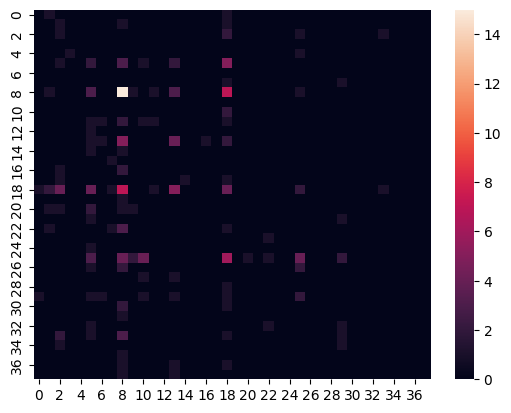

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

### Individual classes

In [40]:
df.columns[-6:]

Index(['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'], dtype='object')

In [43]:
for y_col in df.columns[-6:]: #loop over remainig ECs
    print(y_col)

    #redefine train/test
    y = df[y_col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1119)

    print("Target Class Imbalance:")
    print(y_train.value_counts()/y_train.shape[0],"\n\n")

    #Modelling
    knn_baseline = KNeighborsClassifier(n_neighbors = 5)
    knn_baseline.fit(x_train,y_train)
    y_pred = knn_baseline.predict(x_test)

    knn_metrics[f"KNN5_{y_col}"] = [ #append dataframe
                accuracy_score(y_test, y_pred), #'accuracy'
    #"weighted" argument parameter is artifact from multiclass classifications and can be removed
                precision_score(y_test, y_pred,average="weighted"), #'precision'
                recall_score(y_test, y_pred,average="weighted"), #'recall'
                f1_score(y_test, y_pred,average="weighted") #'f1_score'
    ]

    print(f"{y_col} Train accuracy:", knn_baseline.score(x_train, y_train))
    print(f"{y_col} Test accuracy:", knn_baseline.score(x_test, y_test))
    print("\n\n")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------------------\n\n\n")


knn_metrics

EC1
Target Class Imbalance:
EC1
1    0.53911
0    0.46089
Name: count, dtype: float64 


EC1 Train accuracy: 0.7123947051744886
EC1 Test accuracy: 0.5576923076923077



              precision    recall  f1-score   support

           0       0.51      0.48      0.49        93
           1       0.60      0.62      0.61       115

    accuracy                           0.56       208
   macro avg       0.55      0.55      0.55       208
weighted avg       0.56      0.56      0.56       208

-------------------------------------------------------------------



EC2
Target Class Imbalance:
EC2
1    0.577617
0    0.422383
Name: count, dtype: float64 


EC2 Train accuracy: 0.694344163658243
EC2 Test accuracy: 0.5913461538461539



              precision    recall  f1-score   support

           0       0.45      0.43      0.44        77
           1       0.67      0.69      0.68       131

    accuracy                           0.59       208
   macro avg       0.56      0.56      0.56  

,metric,KNN_multi,KNN5_EC1,KNN5_EC2,KNN5_EC3,KNN5_EC4,KNN5_EC5,KNN5_EC6
0,accuracy,0.149038,0.557692,0.591346,0.658654,0.735577,0.846154,0.884615
1,precision,0.130562,0.555942,0.588091,0.612604,0.697898,0.778462,0.830832
2,recall,0.149038,0.557692,0.591346,0.658654,0.735577,0.846154,0.884615
3,f1,0.129058,0.556612,0.589600,0.623144,0.704637,0.810897,0.843195


KNNs consistently underpredicting minority class (class imbalance)

--> underfitting

*KNNs did perform better than their DT coumterparts*

# repeat [previous](https://colab.research.google.com/drive/1ZJCuYuaSHqfiTpg7zojcxgW8KOTyX4Wg?authuser=1#scrollTo=S9yHb9WLpvvo&line=1&uniqifier=1) modelling (change to rand.for.) for each target EC (6 classes) per csv (3 csvs) & investigate feature importance
**3csvs * 6classes = 18 random forests**

Attempting dimensionality reduction

## df_desc

# FUTURE: Using natural multilabel classifiers, e.g., [MultiOutputClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) & [ClassifierChain](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html)

# FUTURE: Using oversampling/synthetic data (e.g., SMOTE) techniques to handle class imbalance
--> issue: how to go about doing so when classes are not independent?

* only of concern in classifier chains?